<a href="https://colab.research.google.com/github/ritwiks9635/my_new_project_2/blob/main/job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT MODULE

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset From Seaborn

In [ ]:
data = sns.load_dataset("titanic")
data.head(9)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False


In [ ]:
data.shape

(891, 15)

Target value count

In [ ]:
df = data["survived"].value_counts()

In [ ]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
n_rows = 2
n_cols = 3
# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols+ c #index to go through the number of columns
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(data[cols[i]],  ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right')
plt.tight_layout()   #tight_layout

Look at survival rate by sex

In [ ]:
data.groupby("sex") [["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


Look at survival rate by sex and class

In [ ]:
data.pivot_table("survived", index = "sex", columns = "class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Look at survival rate by sex and class visually

<Axes: xlabel='sex'>

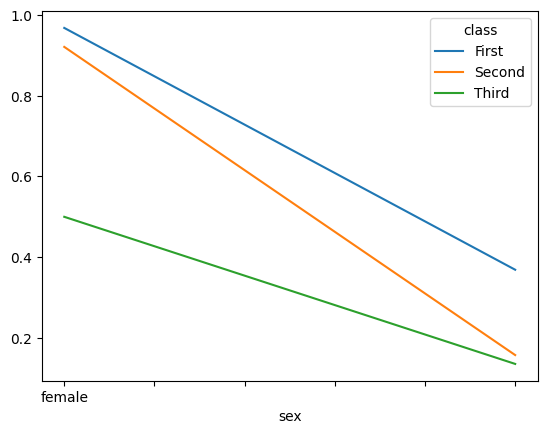

In [ ]:
data.pivot_table("survived", index = "sex", columns = "class").plot()

Plot the survival rate of each class.

<Axes: xlabel='class', ylabel='survived'>

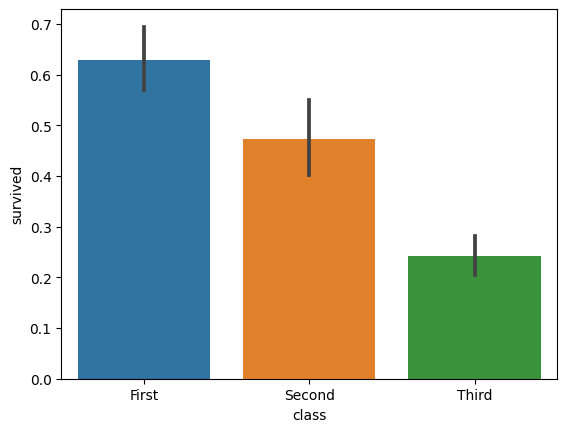

In [ ]:
sns.barplot(x = 'class', y = 'survived', data = data)

Look at survival rate by sex, age and class

In [ ]:
age = pd.cut(data["age"], [0, 18, 80])
data.pivot_table("survived", index = ["sex", age], columns = "class")

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Plot the prices paid for each class.

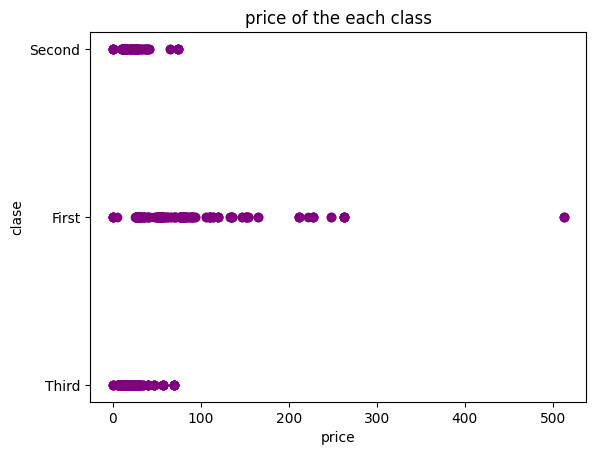

In [ ]:
plt.scatter(data["fare"], data["class"], color = "purple", label = "passenger paid")
plt.ylabel("clase")
plt.xlabel("price")
plt.title("price of the each class")
plt.show()

Count the empty (NaN, NAN, na) values in each column

In [ ]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Look at all of the values in each column & get a count

In [ ]:
for val in data:
  print(data[val].value_counts())
print()

In [ ]:
688/891*100

77.21661054994388

Drop the columns

In [ ]:
data = data.drop(["deck", "embark_town", "alive", "alone", "who", "class", "adult_male"], axis = 1)

Remove the rows with missing values

In [ ]:
data = data.dropna(subset = ["embarked", "age"])

In [ ]:
data.shape

(712, 8)

In [ ]:
data.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

Print the unique values in the columns

In [ ]:
print(data["sex"].unique())
print(data["embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


Encoding categorical data values (Transforming object data types to integers)

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [ ]:
data.iloc[:,2]= le.fit_transform(data.iloc[:,2].values)

<ipython-input-29-987f50fc4814>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,2]= le.fit_transform(data.iloc[:,2].values)


In [ ]:
data.iloc[:,7]= le.fit_transform(data.iloc[:,7].values)

<ipython-input-30-4213aca71da8>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,7]= le.fit_transform(data.iloc[:,7].values)


Print the NEW unique values in the columns

In [ ]:
print(data["sex"].unique())
print(data["embarked"].unique())

[1 0]
[2 0 1]


Split the data into independent 'X' and dependent 'Y' variables

In [ ]:
X = data.iloc[:, 1:8].values
y = data.iloc[:, 0].values

Split the dataset training and testing

In [ ]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Create a function within many Machine Learning Models

In [ ]:
def models(X_train,y_train):
  
  #Using Logistic Regression Algorithm 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)

#print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

Train all the models

In [ ]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


Use the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
  print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print(cm)
  print()

Model[0] Testing Accuracy = "0.8111888111888111 !"
[[73  9]
 [18 43]]

Model[1] Testing Accuracy = "0.7832167832167832 !"
[[71 11]
 [20 41]]

Model[2] Testing Accuracy = "0.7902097902097902 !"
[[70 12]
 [18 43]]

Model[3] Testing Accuracy = "0.7972027972027972 !"
[[75  7]
 [22 39]]

Model[4] Testing Accuracy = "0.7482517482517482 !"
[[69 13]
 [23 38]]

Model[5] Testing Accuracy = "0.7762237762237763 !"
[[60 22]
 [10 51]]

Model[6] Testing Accuracy = "0.8041958041958042 !"
[[67 15]
 [13 48]]



Get the importance of the features

In [ ]:
forest = model[6]
importances = pd.DataFrame({'feature':data.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


Visualize the importance

<Axes: xlabel='feature'>

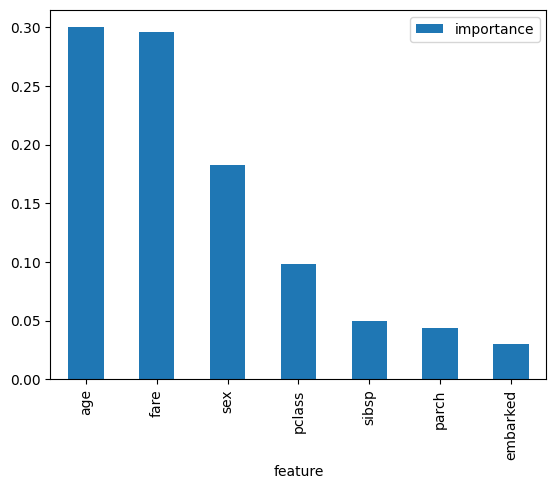

In [ ]:
importances.plot.bar()

Model predict

In [ ]:
pred = model[6].predict(X_test)
print(pred)
print()
print(y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
# pclass = 3, sex = 1, age = 21, sibsp= 0, parch = 0, fare = 0, embarked = 1
survival = [[3,1,21,0,0,0,1]]
pred = model[6].predict(survival)

if pred == 0:
  print("😭😭😭😭😭 you dont survived")
else:
  print("😂😂😂😂😂 you survived")

😭😭😭😭😭 you dont survived
